We are building a *supervised* learning system, because we have historical data with target values that we're going to train our model on. It is a *regression* task, because we want to predict a target value based on other variable. And lastly, we'll use *batch learning* because fires aren't a streaming source of data that is continuosly occuring. We can train our model with a batch of historical data.

Selecting a Performance Measure
-------------------------------

Now we need to choose a way to measure the performance of our model. The typical choice for a regression problem is the Root Mean Square Error. It measures how much error our system makes in its predictions with a higher weight for larger errors.

In [675]:
import pandas 
import numpy

from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

%matplotlib inline

In [676]:
seed = 7
numpy.random.seed(seed)

In [677]:

fdata=pandas.read_csv("train.csv")


# Variables are:
#1. X - x-axis spatial coordinate within the
Montesinho park map: 1 to 9
#2. Y - y-axis spatial coordinate within the
Montesinho park map: 2 to 9
#3. month - month of the year: ’jan’ to ’dec’
#4. day - day of the week: ’mon’ to ’sun’
#5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
#6. DMC - DMC index from the FWI system: 1.1 to 291.3
#7. DC - DC index from the FWI system: 7.9 to 860.6
#8. ISI - ISI index from the FWI system: 0.0 to 56.10
#9. temp - temperature in Celsius degrees: 2.2 to 33.30
#10. RH - relative humidity in %: 15.0 to 100
#11. wind - wind speed in km/h: 0.40 to 9.40
#12. rain - outside rain in mm/m2 : 0.0 to 6.4

FFMC - Fine Fuel Moisture Code

DMC - Duff Moisture Code

DC - Drought Code

ISI - Initial Spread Index

In [678]:
fdata.columns = [ "x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", "isi", "temp",
              "rh", "wind", "rain", "area" ]

fdata.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [679]:
fdata.isnull().sum()

x_coord    0
y_coord    0
month      0
day        0
ffmc       0
dmc        0
dc         0
isi        0
temp       0
rh         0
wind       0
rain       0
area       0
dtype: int64

**To check the missing values in each features


In [680]:
from sklearn.preprocessing import LabelEncoder

le_month = LabelEncoder()
fdata["month"] = le_month.fit_transform(fdata["month"])

le_day = LabelEncoder()
fdata["day"] = le_day.fit_transform(fdata["day"])

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0601933c8>


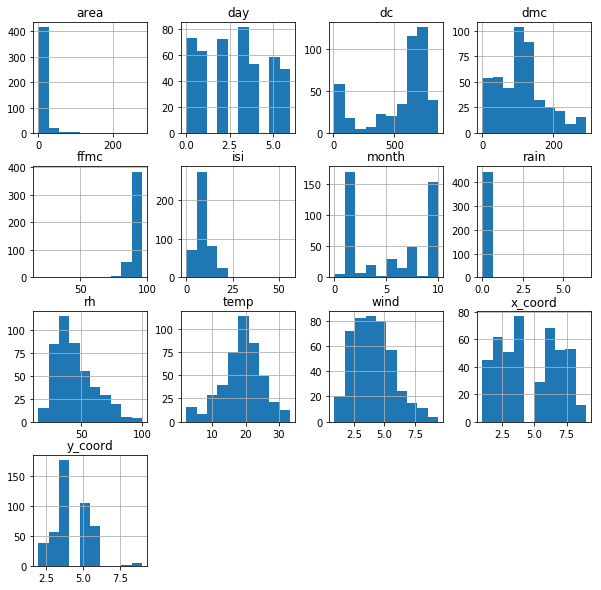

In [681]:
print(fdata.hist(figsize=(10,10)) ) 

Temp' has near desired distribution. many others features are positive skews or negative skews 

In [682]:
fdata.describe()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,4.630290,4.302895,5.224944,2.775056,90.702450,112.300668,547.708241,9.120490,19.000000,44.619154,4.051893,0.024944,8.505991
std,2.335015,1.232744,3.915480,1.938957,5.497444,65.964960,249.564405,4.646343,5.852926,16.250953,1.752117,0.317498,25.823646
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.700000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,5.000000,3.000000,91.600000,108.000000,658.200000,8.400000,19.400000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,10.000000,4.000000,92.900000,142.400000,715.100000,10.800000,22.800000,54.000000,4.900000,0.000000,6.300000
max,9.000000,9.000000,10.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,278.530000


x_coord        AxesSubplot(0.125,0.71587;0.168478x0.16413)
y_coord     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
month       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
day         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ffmc          AxesSubplot(0.125,0.518913;0.168478x0.16413)
dmc        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dc         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
isi        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
temp          AxesSubplot(0.125,0.321957;0.168478x0.16413)
rh         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
wind       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
rain       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area             AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

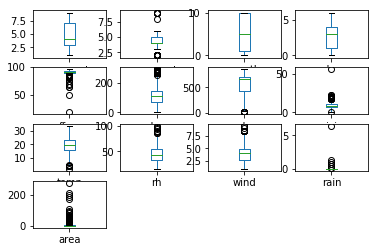

In [683]:
fdata.plot(kind='box', subplots=True, layout=(4,4))

area    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

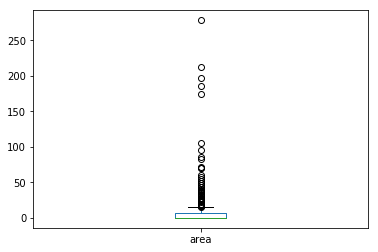

In [684]:
fdata["area"].plot(kind='box', subplots=True, layout=(1,1))

ffmc    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

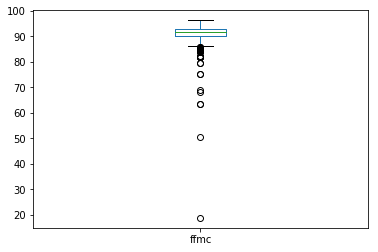

In [685]:
fdata["ffmc"].plot(kind='box', subplots=True, layout=(1,1))

rain    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

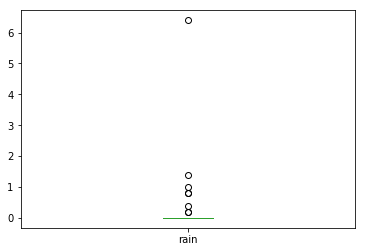

In [686]:
fdata["rain"].plot(kind='box', subplots=True, layout=(1,1))

rh    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

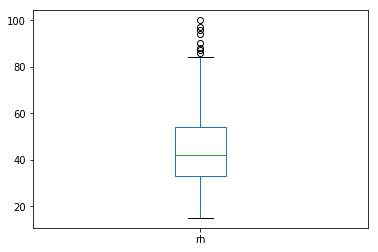

In [687]:
fdata["rh"].plot(kind='box', subplots=True, layout=(1,1))

In [688]:
print( fdata.corr(method='pearson'))

          x_coord   y_coord     month       day      ffmc       dmc        dc  \
x_coord  1.000000  0.542264 -0.001138 -0.035665 -0.001964 -0.032311 -0.070450   
y_coord  0.542264  1.000000 -0.049756  0.011760 -0.042566  0.018348 -0.094964   
month   -0.001138 -0.049756  1.000000 -0.143268 -0.030876 -0.217907  0.146823   
day     -0.035665  0.011760 -0.143268  1.000000  0.083710  0.065995  0.059892   
ffmc    -0.001964 -0.042566 -0.030876  0.083710  1.000000  0.367949  0.301867   
dmc     -0.032311  0.018348 -0.217907  0.065995  0.367949  1.000000  0.680287   
dc      -0.070450 -0.094964  0.146823  0.059892  0.301867  0.680287  1.000000   
isi      0.027364 -0.014648 -0.176198  0.134356  0.516703  0.267680  0.199578   
temp    -0.053032 -0.014943 -0.124128  0.147910  0.419044  0.448764  0.484590   
rh       0.092517  0.055465 -0.095857 -0.114297 -0.301818  0.074996 -0.030623   
wind     0.032689 -0.012564 -0.137383 -0.000367 -0.018807 -0.104803 -0.210509   
rain     0.070878  0.035402 



Temp has the highest correlation(0.068491 ) with the area of forest fire(which is a positive correlation that means increase in temp ,area will increase),  'Rain' has the least correlation(0.006257) which is negative correlation that means area will decrease due to increase in rain




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0648ba4e0>,
      dtype=object)

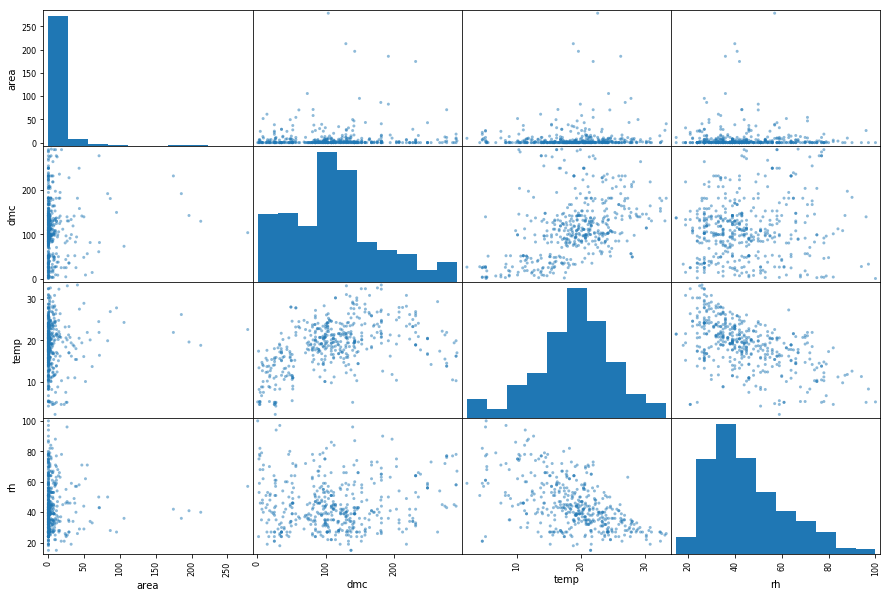

In [689]:
from pandas.plotting import scatter_matrix

attributes = ['area', 'dmc', 'temp', 'rh']
scatter_matrix(fdata[attributes], figsize=(15,10))

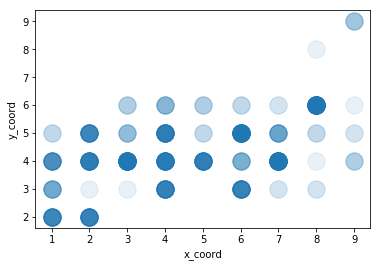

In [690]:
fdata.plot(kind='scatter', x="x_coord", y= "y_coord", alpha=0.1, s=300)

From this we can say mostof our fires take place in the center and bottom left area. Most of the top and very bottom of our map is empty. This is may be possibly due to  nature of area,matterial which do not burn easily etc.

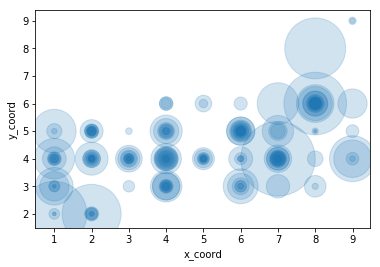

In [691]:

fdata.plot(kind='scatter', x="x_coord", y= "y_coord", alpha=0.2, s=20*fdata['area'])

 more fires tend to happen in the left central side, but they tend to be smaller. Those on the right side tend to be bigger but more infrequent. 


In [692]:
y = fdata.pop("area")
fdata=fdata-fdata.mean()
fdata=fdata/fdata.std()
fdata.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
0,1.014859,0.565490,0.453343,-1.431210,-0.819008,-1.305249,-1.816799,-0.865302,-1.845231,0.392644,1.511376,-0.078565
1,1.014859,-0.245708,0.964136,1.147495,-0.018636,-1.165781,0.486415,-0.520945,-0.170855,-0.714983,-1.798906,-0.078565
2,1.443122,1.376689,0.453343,-1.431210,0.181457,-1.197616,-1.884116,-0.025932,-1.828145,3.223248,-0.029617,0.551360
3,1.443122,1.376689,-1.079036,0.116013,0.290599,-0.409318,-0.239250,1.200839,0.546735,-0.961122,0.769416,-0.078565
4,1.443122,1.376689,-1.079036,-0.915469,0.290599,-0.354744,-0.208797,-0.133544,0.871359,-1.084192,-0.543282,-0.078565


In [693]:
fdata.describe()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
count,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02,4.490000e+02
mean,-2.388587e-16,1.321635e-16,2.828720e-16,2.991915e-17,4.389622e-14,-7.180596e-16,-1.127532e-15,3.785638e-16,1.422149e-15,-1.854493e-16,-2.744649e-17,1.149786e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.554718e+00,-1.868106e+00,-1.334433e+00,-1.431210e+00,-1.309744e+01,-1.685754e+00,-2.163002e+00,-1.962939e+00,-2.870359e+00,-1.822610e+00,-1.798906e+00,-7.856529e-02
25%,-6.981923e-01,-2.457083e-01,-1.079036e+00,-9.154692e-01,-9.139700e-02,-6.624831e-01,-4.408010e-01,-5.639897e-01,-5.638206e-01,-7.149829e-01,-7.715771e-01,-7.856529e-02
50%,-2.699295e-01,-2.457083e-01,-5.745000e-02,1.160130e-01,1.632668e-01,-6.519625e-02,4.427385e-01,-1.550660e-01,6.834189e-02,-1.611692e-01,-2.961738e-02,-7.856529e-02
75%,1.014859e+00,5.654904e-01,1.219533e+00,6.317542e-01,3.997403e-01,4.562927e-01,6.707357e-01,3.614692e-01,6.492479e-01,5.772490e-01,4.840471e-01,-7.856529e-02
max,1.871384e+00,3.810285e+00,1.219533e+00,1.663236e+00,1.000019e+00,2.713552e+00,1.253752e+00,1.011107e+01,2.443222e+00,3.407852e+00,3.052369e+00,2.007904e+01


In [694]:

y=(y+1)
    
y= numpy.log(y)
#y=numpy.log(1+y)
#y.describe(

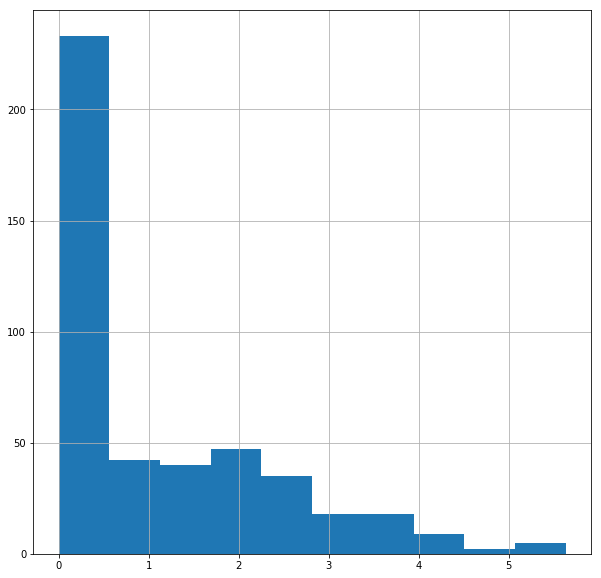

In [695]:
y.hist(figsize=(10,10)) 

In [696]:

print(y.shape)

fdata.pop("rain")
fdata.pop("month")
fdata.pop("day")



X=fdata

(449,)


In [697]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=40)

In [715]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [711]:
predictions = lr_model.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.2718623780853002


In [714]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score( lr_model, X, y,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = numpy.sqrt(-lr_scores)
print(lr_rmse_scores.mean())

1.392033080840435


In [700]:
#print(X.describe())
rng = numpy.random.RandomState(10)

In [701]:

clf_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                     n_estimators=50, random_state=rng)

clf_1.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=<mtrand.RandomState object at 0x7fe0612330d8>)

In [702]:
#X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=19)

In [703]:
predictions = clf_1.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.3052591781433136


In [704]:
from sklearn.model_selection import cross_val_score

abr_scores = cross_val_score(clf_1, X, y,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = numpy.sqrt(-dtr_scores)
print(dtr_rmse_scores.mean())

2.1171506046666884


In [705]:
from sklearn.tree import DecisionTreeRegressor

clf_2 = DecisionTreeRegressor()
clf_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [708]:
predictions = clf_2.predict(X_test)
#predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1.821642912597693


In [709]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(clf_2, X, y,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = numpy.sqrt(-dtr_scores)
print(dtr_rmse_scores.mean())

2.111018076805321


In [716]:
test=pandas.read_csv("test.csv")

In [717]:
test.columns = ["Id", "x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", "isi", "temp",
              "rh", "wind", "rain" ]

In [718]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le_month = LabelEncoder()
test["month"] = le_month.fit_transform(test["month"])

le_day = LabelEncoder()
test["day"] = le_day.fit_transform(test["day"])



In [719]:

test.pop("rain")
test.pop("month")
test.pop("day")
test.pop("Id")

test = (test - test.mean())/test.std()


In [721]:
predictions = lr_model.predict(test)
predictions=numpy.expm1(predictions)
#predictions=numpy.expm1(predictions)
    # Evaluate the model
#rms = sqrt(mean_squared_error(y, predictions))
#model.score(X,Y)

    #mae = mean_absolute_error(predictions, Y)
   # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #results.append(mae)
    #names.append(name)
    
    #msg = "%s: %f (%f)" % (name, score, mae)
    #print(msg)
#print(rms)
#predictions

In [722]:
#ans=pandas.read_csv("ans.csv")
ans=pandas.read_csv("myteam.csv")
#sampleSubmission = .values
# print(ans)

#X =sampleSubmission[:,0:1]
raw_data={'area' : predictions}
#@ID={'Id':X}
#ans.insert(1,'area', predictions, allow_duplicates=True)
s = pandas.DataFrame(raw_data, columns = ['area'])
ans=pandas.concat([ans,s],axis=1)
#ans['area'] = predictions
ans.to_csv('myteam.csv')